Problem Statement:  
For a safe and secure lending experience, it's important to analyze the past data. In this project, you have to build a deep learning model to predict the chance of default for future loans using historical data. As you will see, this dataset is highly imbalanced and includes a lot of features that make this problem more challenging.


**Objective:**

Create a model that predicts whether or not an applicant will be able to repay a loan using historical data


**Domain:** Finance

**Analysis to be done:**

Perform data preprocessing and build a deep learning prediction model

**Steps to be done**

1.   Load the dataset that is given to youList item
2.  Check for null values in the dataset
3.   Print the percentage of default to a payer of the dataset for the TARGET column
4.  Balance the dataset if the data is imbalanced
5.  Plot the balanced or imbalanced data
6.  	Encode the columns that are required for the model
7. Calculate sensitivity as a metric
8.   Calculate the area under the receiver operating characteristics curve









In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Load Dataset**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

loan_data = pd.read_csv('/content/drive/MyDrive/ML/loan_data.csv')
print(loan_data.shape)


(307511, 122)


Data is 122 columns, but we may not need all those columns. We will first extract features that have a meaningful correlation with TARGET and then check of null values and outliers for those features



In [4]:
corr = loan_data.select_dtypes(include='number').corr()
correlations = corr.abs().sort_values('TARGET',ascending=False).iloc[:,[1]]
corr = correlations.loc[correlations.TARGET > 0.033]
corr

,TARGET
TARGET,1.000000
EXT_SOURCE_3,0.178919
EXT_SOURCE_2,0.160472
EXT_SOURCE_1,0.155317
DAYS_BIRTH,0.078239
REGION_RATING_CLIENT_W_CITY,0.060893
REGION_RATING_CLIENT,0.058899
DAYS_LAST_PHONE_CHANGE,0.055218
DAYS_ID_PUBLISH,0.051457
REG_CITY_NOT_WORK_CITY,0.050994


Create a new dataset with the above features

In [5]:
features = corr.index
new_data = loan_data[features]
print(new_data.shape)
#check null values
new_data.isnull().sum()


(307511, 25)


,0
TARGET,0
EXT_SOURCE_3,60965
EXT_SOURCE_2,660
EXT_SOURCE_1,173378
DAYS_BIRTH,0
REGION_RATING_CLIENT_W_CITY,0
REGION_RATING_CLIENT,0
DAYS_LAST_PHONE_CHANGE,1
DAYS_ID_PUBLISH,0
REG_CITY_NOT_WORK_CITY,0


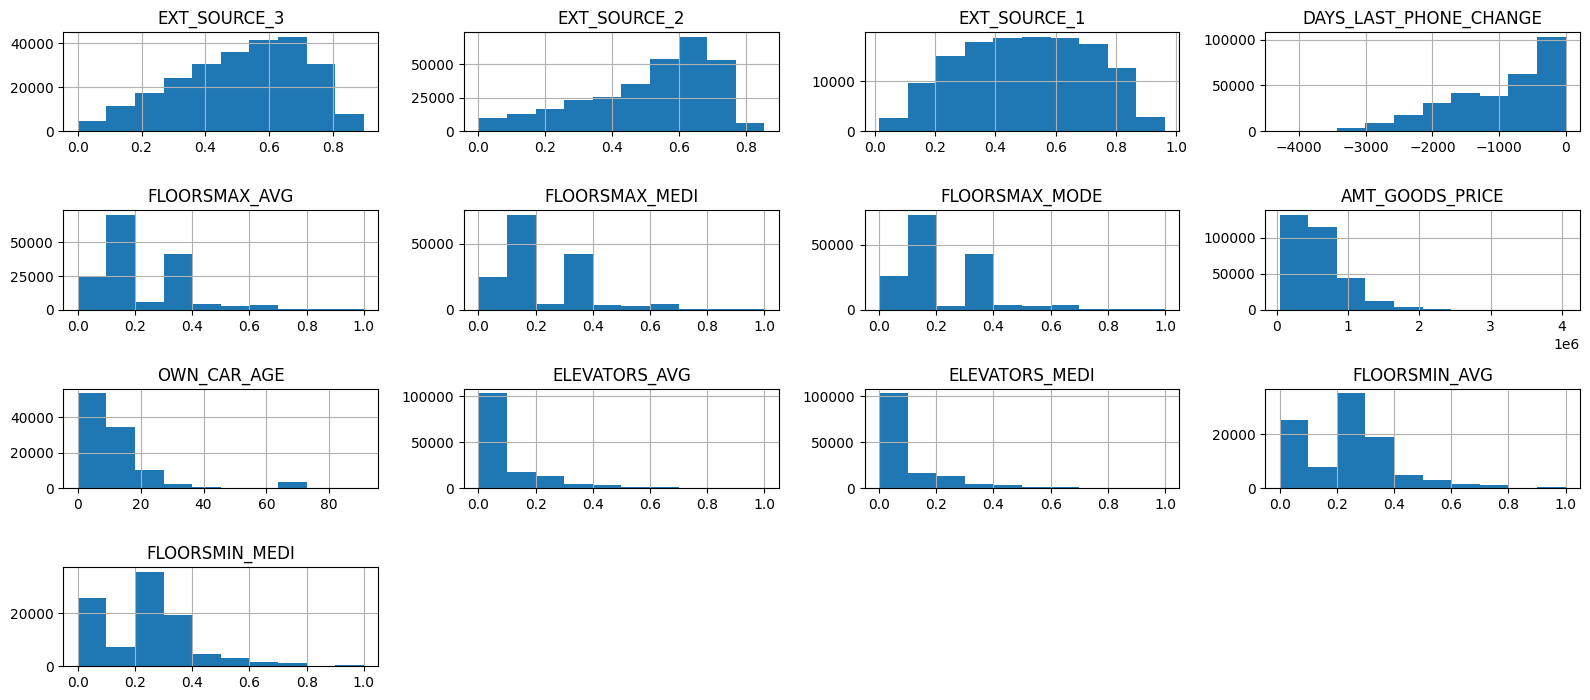

In [6]:
columns = []
# lets look at the distributions of columns that have null values
for col in new_data.columns:
  if new_data[col].isnull().any():
    columns.append(col)

new_data[columns].hist(figsize=(16,14),layout=(8,4))
plt.tight_layout()
plt.show()


**Check for outliers**

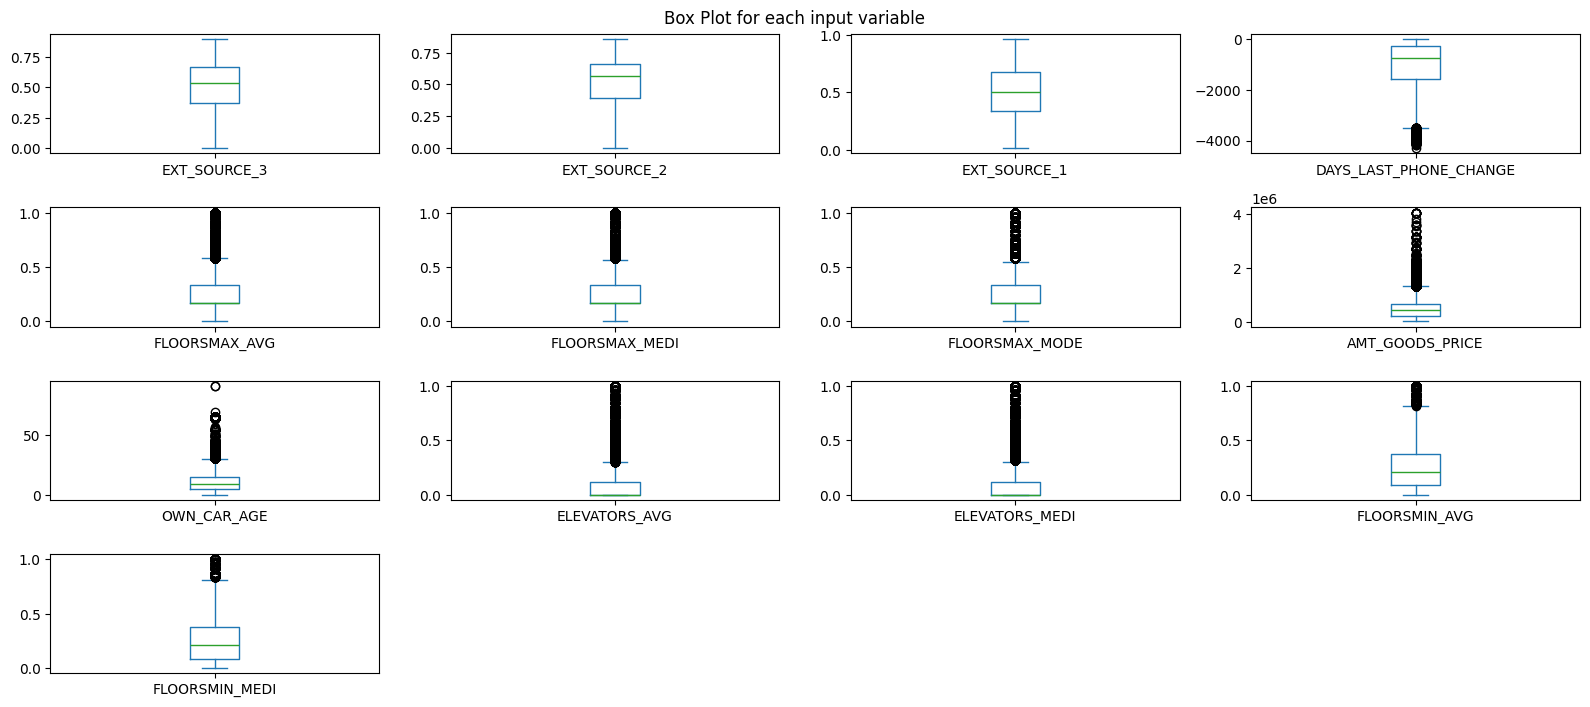

In [7]:
new_data[columns].plot(kind='box',
                       subplots=True,
                       layout=(8,4),
                       sharex=False,
                       sharey=False,
                       figsize=(16,14),
                       title='Box Plot for each input feature')
plt.tight_layout()
plt.show()

Replace outliers and null values with median

In [8]:
import numpy as np

def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3 - q1
    lwr_bound = q1 - (1.5 * IQR)
    upr_bound = q3 + (1.5 * IQR)
    outliers = []
    for i in data:
        if i < lwr_bound or i > upr_bound:
            outliers.append(i)
    return outliers


def remove_outliers(data, outlier_columns):

  for column in outlier_columns:
      print('imputing values for column ',column)
      array = data[column]
      outliers = detect_outliers_iqr(array)
      value = np.median(array)
      for i in outliers:
          # for every i(outlier) in array , replace it by value else retain the same array element
          array = np.where(array == i, value, array)
          data[column] = np.asarray(array)

  return data

# Fill null values
for column in columns:
  new_data[column].fillna(new_data[column].median(),inplace=True)

# null values replaced
print('Are null values present? -> ',new_data.isnull().sum().any())

# Remove outliers
new_data = remove_outliers(new_data, columns)


Are null values present? ->  False
imputing values for column  EXT_SOURCE_3
imputing values for column  EXT_SOURCE_2
imputing values for column  EXT_SOURCE_1
imputing values for column  DAYS_LAST_PHONE_CHANGE
imputing values for column  FLOORSMAX_AVG
imputing values for column  FLOORSMAX_MEDI
imputing values for column  FLOORSMAX_MODE
imputing values for column  AMT_GOODS_PRICE
imputing values for column  OWN_CAR_AGE
imputing values for column  ELEVATORS_AVG
imputing values for column  ELEVATORS_MEDI
imputing values for column  FLOORSMIN_AVG
imputing values for column  FLOORSMIN_MEDI


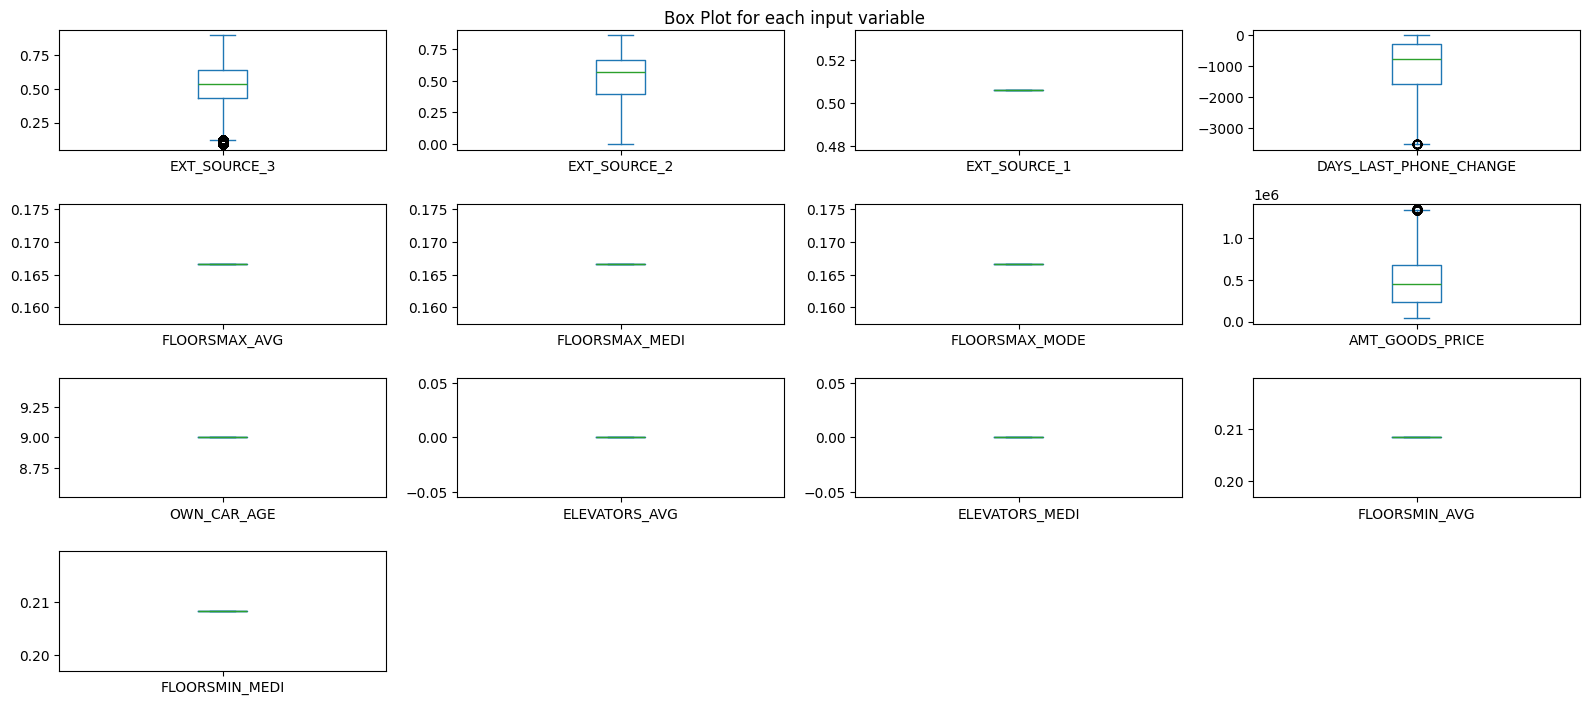

In [9]:
new_data[columns].plot(kind='box',
                       subplots=True,
                       layout=(8,4),
                       sharex=False,
                       sharey=False,
                       figsize=(16,14),
                       title='Box Plot for each input variable')
plt.tight_layout()
plt.show()

In [10]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       307511 non-null  int64  
 1   EXT_SOURCE_3                 307511 non-null  float64
 2   EXT_SOURCE_2                 307511 non-null  float64
 3   EXT_SOURCE_1                 307511 non-null  float64
 4   DAYS_BIRTH                   307511 non-null  int64  
 5   REGION_RATING_CLIENT_W_CITY  307511 non-null  int64  
 6   REGION_RATING_CLIENT         307511 non-null  int64  
 7   DAYS_LAST_PHONE_CHANGE       307511 non-null  float64
 8   DAYS_ID_PUBLISH              307511 non-null  int64  
 9   REG_CITY_NOT_WORK_CITY       307511 non-null  int64  
 10  FLAG_EMP_PHONE               307511 non-null  int64  
 11  DAYS_EMPLOYED                307511 non-null  int64  
 12  REG_CITY_NOT_LIVE_CITY       307511 non-null  int64  
 13 

No column needs to be encoded

**Default percentage**

In [11]:
total_borrowers = new_data.shape[0]
value_counts_1 = pd.DataFrame(new_data[new_data['TARGET'] == 1].groupby('TARGET').size()).reset_index()
defaulted = value_counts_1[0].to_list().pop()
print(f'Percentage defaulted is  {100*defaulted/total_borrowers:.2f}')

Percentage defaulted is  8.07


Adding an Age column from DAYS_BIRTH column

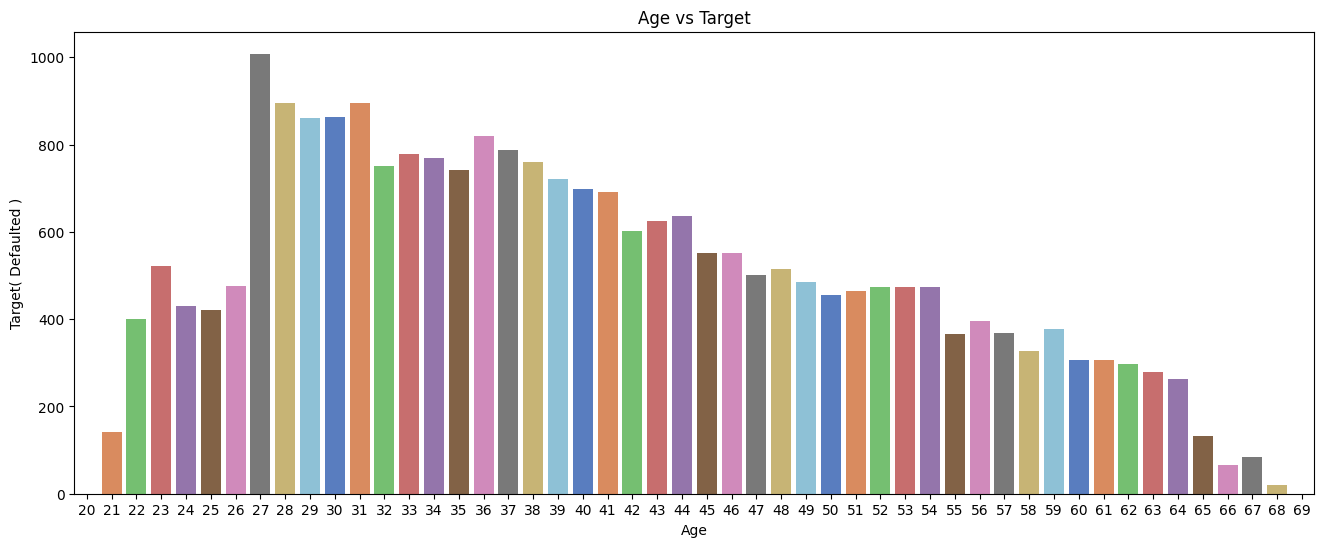

In [12]:
def preprocess(data):
  data['AGE'] = new_data['DAYS_BIRTH'].apply(lambda x: int(abs(x)/365))
  data.drop('DAYS_BIRTH',axis=1,inplace=True)
preprocess(new_data)
df = pd.DataFrame(new_data.groupby(['AGE']).TARGET.sum()).reset_index()
plt.figure(figsize=(16,6))
sns.barplot(x='AGE',y='TARGET',data=df,palette=sns.color_palette('muted'))
plt.title('Age vs Target')
plt.ylabel('Target( Defaulted )')
plt.xlabel('Age')
plt.show()

Check class imbalance to fix

TARGET
0    282686
1     24825
Name: count, dtype: int64


<Axes: ylabel='TARGET'>

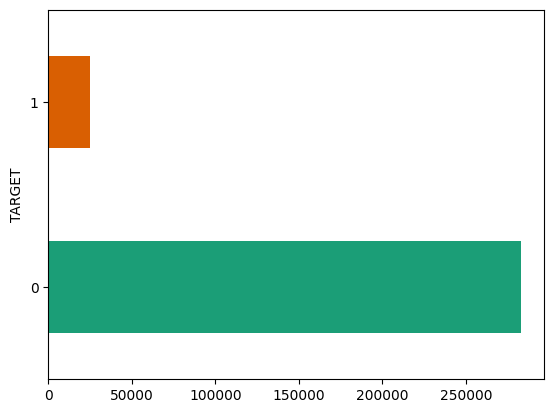

In [13]:
# Check imbalance
print(new_data.TARGET.value_counts())
new_data.groupby('TARGET').size().plot(kind='barh',color=sns.palettes.mpl_palette('Dark2'))

In [14]:
TARGET_0=new_data[new_data['TARGET']==0]
TARGET_1=new_data[new_data['TARGET']==1]
print(TARGET_0.shape)
print(TARGET_1.shape)

(282686, 25)
(24825, 25)


In [15]:
from sklearn.utils import resample
TARGET_1_upsampled=resample(TARGET_1,replace=True,n_samples=len(TARGET_0),random_state=42)
new_df=pd.concat([TARGET_0,TARGET_1_upsampled])
new_df['TARGET'].value_counts()

,count
TARGET,
0,282686
1,282686


In [16]:
from sklearn.utils import shuffle
new_df = pd.concat([TARGET_0,TARGET_1_upsampled])
new_data=shuffle(new_df)
new_data.head()

,TARGET,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY,FLAG_EMP_PHONE,...,FLOORSMAX_MODE,DAYS_REGISTRATION,AMT_GOODS_PRICE,OWN_CAR_AGE,REGION_POPULATION_RELATIVE,ELEVATORS_AVG,ELEVATORS_MEDI,FLOORSMIN_AVG,FLOORSMIN_MEDI,AGE
118680,1,0.196334,0.540619,0.505998,2,2,-4.0,-4930,0,1,...,0.1667,-6032.0,765000.0,9.0,0.007274,0.0,0.0,0.2083,0.2083,42
138308,1,0.231439,0.090180,0.505998,2,2,0.0,-5207,0,0,...,0.1667,-5208.0,270000.0,9.0,0.035792,0.0,0.0,0.2083,0.2083,64
233498,0,0.535276,0.517074,0.505998,3,3,-510.0,-1763,1,1,...,0.1667,-2408.0,432000.0,9.0,0.002134,0.0,0.0,0.2083,0.2083,24
205744,1,0.567379,0.684987,0.505998,2,2,-477.0,-1549,0,1,...,0.1667,-3036.0,492547.5,9.0,0.008230,0.0,0.0,0.2083,0.2083,51
163317,0,0.590233,0.160355,0.505998,3,3,-470.0,-4872,0,1,...,0.1667,-4849.0,450000.0,9.0,0.002134,0.0,0.0,0.2083,0.2083,37


In [17]:
X = new_data.drop('TARGET',axis=1)
y = new_data['TARGET']
print('X shape -> ',X.shape)
print('y shape -> ',y.shape)

X shape ->  (565372, 24)
y shape ->  (565372,)


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create ANN using keras & tf

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
# l2 regularizer
from tensorflow.keras.regularizers import l2
from tensorflow import keras
model=Sequential()
# this will eliminate UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
inputs = keras.Input(shape=(X_train.shape[1],))
model.add(inputs)
# add first hidden layer
model.add(Dense(units=32,activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
# add scond hidden layer
model.add(Dense(units=64,activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
# third hidden layer
model.add(Dense(units=128,activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
# output
model.add(Dense(1,activation='sigmoid'))
print('model created')

model created


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,257 (47.88 KB)

 Trainable params: 11,809 (46.13 KB)

 Non-trainable params: 448 (1.75 KB)

In [21]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
print('model compiled')

model compiled


In [22]:
# set up early stopping and model checkpoint call backs and train the model.
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10,min_delta=0.01)
checkpoint=ModelCheckpoint('best_model.h5',monitor='val_loss',mode='min',verbose=1,save_best_only=True)
history=model.fit(X_train,y_train,
                  epochs=50,batch_size=250,
                  validation_data=(X_test,y_test),
                  callbacks=[early_stop,checkpoint])

Epoch 1/50
1810/1810 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6196 - loss: 0.7661
Epoch 1: val_loss improved from inf to 0.63676, saving model to best_model.h5


1810/1810 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6196 - loss: 0.7661 - val_accuracy: 0.6607 - val_loss: 0.6368
Epoch 2/50
1797/1810 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6546 - loss: 0.6361
Epoch 2: val_loss improved from 0.63676 to 0.62414, saving model to best_model.h5


1810/1810 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.6546 - loss: 0.6360 - val_accuracy: 0.6567 - val_loss: 0.6241
Epoch 3/50
1790/1810 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6552 - loss: 0.6273
Epoch 3: val_loss improved from 0.62414 to 0.62217, saving model to best_model.h5


1810/1810 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6552 - loss: 0.6273 - val_accuracy: 0.6606 - val_loss: 0.6222
Epoch 4/50
1803/1810 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6562 - loss: 0.6261
Epoch 4: val_loss improved from 0.62217 to 0.62118, saving model to best_model.h5


1810/1810 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6562 - loss: 0.6261 - val_accuracy: 0.6621 - val_loss: 0.6212
Epoch 5/50
1798/1810 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6581 - loss: 0.6252
Epoch 5: val_loss improved from 0.62118 to 0.62099, saving model to best_model.h5


1810/1810 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6581 - loss: 0.6252 - val_accuracy: 0.6608 - val_loss: 0.6210
Epoch 6/50
1806/1810 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6572 - loss: 0.6250
Epoch 6: val_loss improved from 0.62099 to 0.61995, saving model to best_model.h5


1810/1810 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6572 - loss: 0.6250 - val_accuracy: 0.6623 - val_loss: 0.6199
Epoch 7/50
1790/1810 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6579 - loss: 0.6248
Epoch 7: val_loss did not improve from 0.61995
1810/1810 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6579 - loss: 0.6248 - val_accuracy: 0.6611 - val_loss: 0.6217
Epoch 8/50
1803/1810 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6576 - loss: 0.6246
Epoch 8: val_loss improved from 0.61995 to 0.61980, saving model to best_model.h5


1810/1810 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6576 - loss: 0.6246 - val_accuracy: 0.6619 - val_loss: 0.6198
Epoch 9/50
1809/1810 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6564 - loss: 0.6260
Epoch 9: val_loss improved from 0.61980 to 0.61979, saving model to best_model.h5


1810/1810 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6564 - loss: 0.6260 - val_accuracy: 0.6635 - val_loss: 0.6198
Epoch 10/50
1792/1810 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6564 - loss: 0.6259
Epoch 10: val_loss improved from 0.61979 to 0.61973, saving model to best_model.h5


1810/1810 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6564 - loss: 0.6259 - val_accuracy: 0.6621 - val_loss: 0.6197
Epoch 11/50
1809/1810 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6573 - loss: 0.6250
Epoch 11: val_loss did not improve from 0.61973
1810/1810 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6573 - loss: 0.6250 - val_accuracy: 0.6609 - val_loss: 0.6198
Epoch 12/50
1797/1810 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6549 - loss: 0.6260
Epoch 12: val_loss did not improve from 0.61973
1810/1810 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6550 - loss: 0.6260 - val_accuracy: 0.6623 - val_loss: 0.6199
Epoch 12: early stopping


In [23]:
score=model.evaluate(X_test,y_test)
print('test loss',score[0])
print('test accuracy',score[1])
score=model.evaluate(X_train,y_train)
print('train loss',score[0])
print('train accuracy',score[1])

3534/3534 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6631 - loss: 0.6184
test loss 0.6198936104774475
test accuracy 0.662286102771759
14135/14135 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - accuracy: 0.6594 - loss: 0.6218
train loss 0.6215254664421082
train accuracy 0.6600176692008972


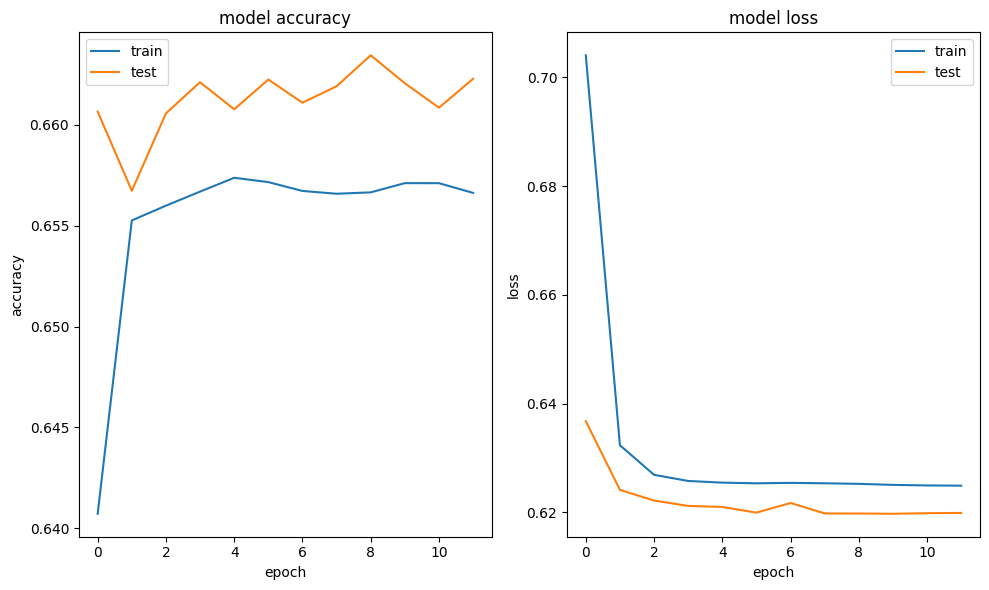

In [24]:

plt.figure(figsize=(10,6))
# accuracy chart
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')

# loss chart
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper right')
plt.tight_layout()
plt.show()

**Prediction using Random Forest Classifier**

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9975237674110103
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56454
           1       1.00      1.00      1.00     56621

    accuracy                           1.00    113075
   macro avg       1.00      1.00      1.00    113075
weighted avg       1.00      1.00      1.00    113075



**Confusion Matrix and Sensitivity**

confusion matrix
 [[56178   276]
 [    4 56617]]


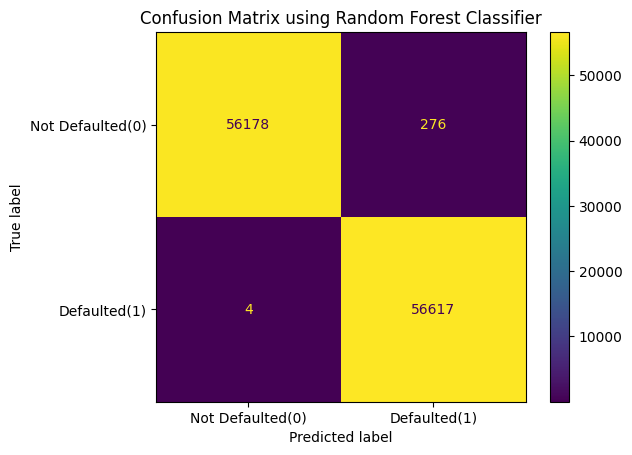

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix\n',cm)
display_labels = ['Not Defaulted(0)','Defaulted(1)']
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=display_labels)
disp.plot()
plt.title('Confusion Matrix using Random Forest Classifier')
plt.show()

In [28]:
# calculate sensitivity
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

sensitivity = TP/(TP+FN)

print(f'Sensitivity = {sensitivity:.4f}')

Sensitivity = 0.9999


**ROC-AUC Curve**

auc = 0.9999818237671291



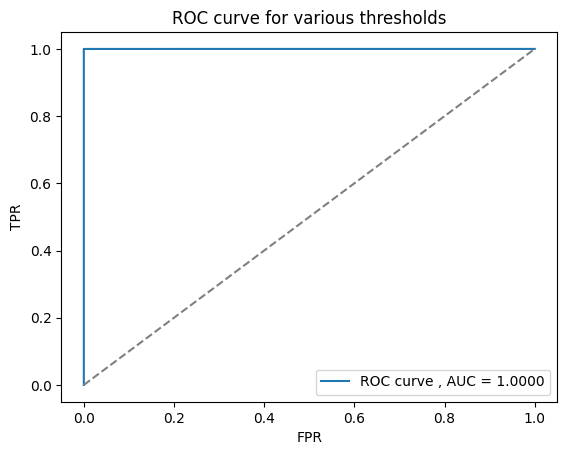

In [29]:
#ROC
from sklearn.metrics import roc_curve,auc

y_pred_test_prob = rf.predict_proba(X_test)
y_pred_proba=y_pred_test_prob[:,1]
fpr,tpr,threshold = roc_curve(y_test, y_pred_proba)
area_under_curve = auc(fpr,tpr)
print('auc = {}\n'.format(area_under_curve))
plt.plot(fpr,tpr,label=f'ROC curve , AUC = {area_under_curve:.4f}')
plt.plot([0,1],[0,1],linestyle='--',color='gray')
plt.xlabel('FPR')
plt.ylabel('TPR')
title_ = 'ROC curve for various thresholds'
plt.title(title_)
plt.legend(loc = 'lower right')
plt.show()
